In [129]:
import pandas as pd
Delivery_full = pd.read_csv("Delivery.csv", sep=",", parse_dates=['Date'])
Delivery_full.info()
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime

Delivery_full['D'] = Delivery_full['Date'.replace('-',' ')]






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     298 non-null    datetime64[ns]
 1   UPS      298 non-null    float64       
 2   FDX      298 non-null    float64       
 3   EBAY     298 non-null    float64       
 4   AMZN     298 non-null    float64       
 5   Average  298 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.1 KB


In [130]:
print(Delivery_full.head(n=10))

        Date         UPS         FDX       EBAY        AMZN    Average  \
0 2020-01-02  107.104660  148.055100  35.564568   94.900497  96.406206   
1 2020-01-03  107.040474  146.222305  35.231457   93.748497  95.560683   
2 2020-01-06  106.563583  146.336838  35.055103   95.143997  95.774880   
3 2020-01-07  106.380180  147.768707  34.898346   95.343002  96.097559   
4 2020-01-08  106.985466  149.992874  34.878750   94.598503  96.613898   
5 2020-01-09  107.233055  150.871094  34.467262   95.052498  96.905977   
6 2020-01-10  106.260963  149.515625  34.183136   94.157997  96.029430   
7 2020-02-03   93.568703  137.306549  33.693260  100.209999  91.194628   
8 2020-02-04   94.806747  140.809845  36.652077  102.483498  93.688042   
9 2020-02-05   97.246155  143.138977  36.377750  101.993500  94.689096   

           D  
0 2020-01-02  
1 2020-01-03  
2 2020-01-06  
3 2020-01-07  
4 2020-01-08  
5 2020-01-09  
6 2020-01-10  
7 2020-02-03  
8 2020-02-04  
9 2020-02-05  


In [132]:
import matplotlib.pyplot as plt
date = Delivery_full['Date']
UPS = Delivery_full['UPS']
FDX = Delivery_full['FDX']
EBAY = Delivery_full['EBAY']
AMZN = Delivery_full['AMZN']
Average = Delivery_full['Average']


<function matplotlib.pyplot.show(close=None, block=None)>

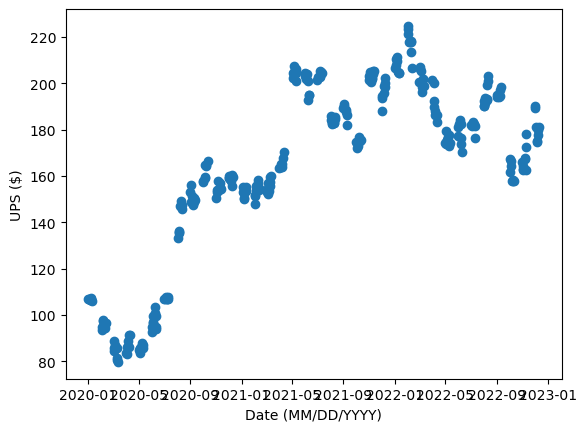

In [133]:
plt.scatter(date, UPS)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('UPS ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

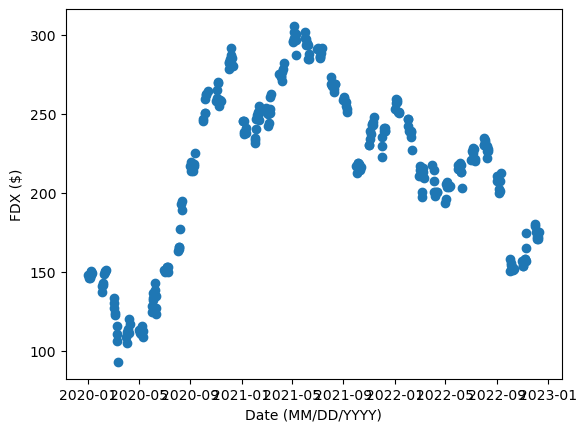

In [134]:
plt.scatter(date, FDX)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('FDX ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

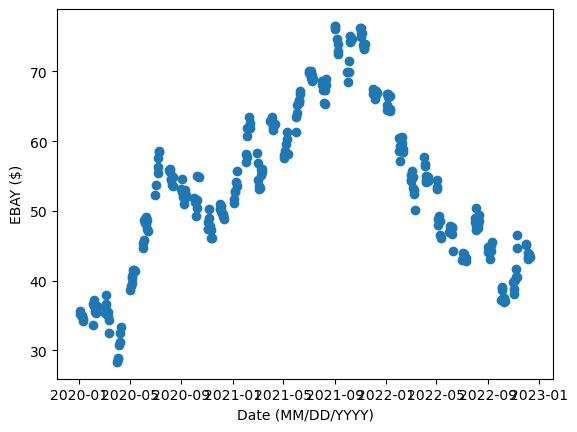

In [135]:
plt.scatter(date, EBAY)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('EBAY ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

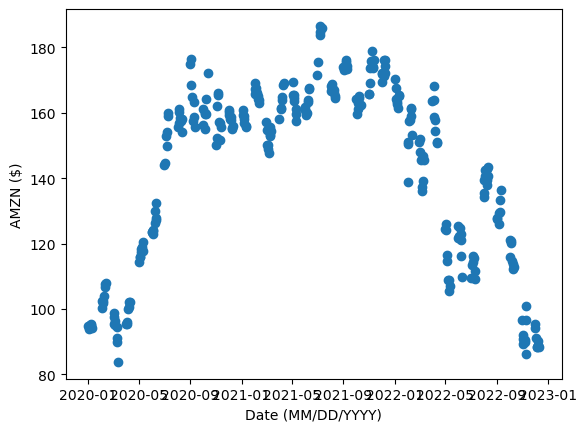

In [136]:
plt.scatter(date, AMZN)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('AMZN ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

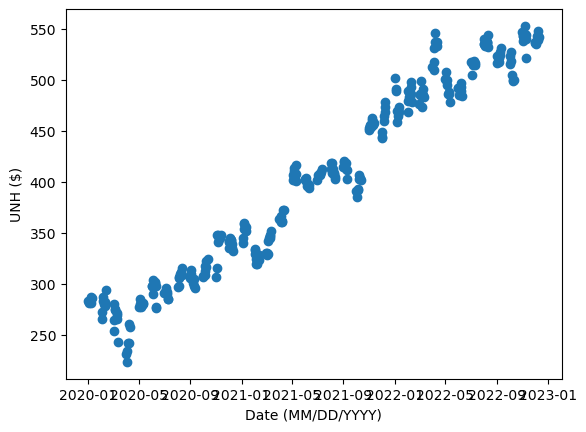

In [137]:
plt.scatter(date, UNH)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('UNH ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

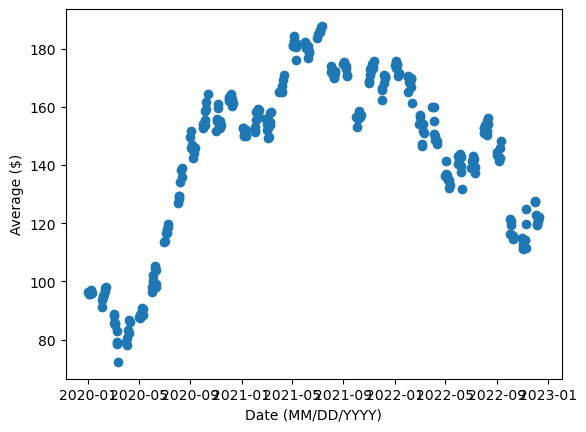

In [138]:
plt.scatter(date, Average)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('Average ($)')
plt.show

In [139]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Delivery_full, 
                                        test_size=.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  238 Test size:  60


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -61.48358144713836
    Coefficients [6.05498124e-90 0.00000000e+00 4.79449259e-53]
    Score 0.1293035081478241
MAE is  23.13395651235876
RMSE is  26.33494671077895
MSE is  693.529418259567
R^2   0.1293035081478241

Results for polynomial regression on test data
MAE is  26.155431336957857
RMSE is  30.00801542904994
MSE is  900.4809899900993
R^2     0.1283545442804569


In [153]:



power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  8
  Default settings
Internal parameters:
    Bias is  -29144.154138050217
    Coefficients [ 2.37928965e-014 -1.03413703e-033 -4.23974910e-052 -1.95445934e-070
 -9.60537237e-089 -4.91477259e-107 -2.58523838e-125 -1.38748009e-143]
    Score 0.8193702653476451
MAE is  9.923624495333986
RMSE is  11.994818161218967
MSE is  143.8756627207084
R^2   0.8193702653476451

Results for elastic net on test data
MAE is  12.474985321133572
RMSE is  14.383357935980168
MSE is  206.8809855145237
R^2     0.7997438336810443


C:\Users\jstcl\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.712e+04, tolerance: 1.896e+01
  model = cd_fast.enet_coordinate_descent(


In [142]:
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['UPS', 'FDX', 'EBAY', 'AMZN']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['UPS', 'FDX', 'EBAY', 'AMZN']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -5.210858375903626e-07
    Coefficients [ 2.50000003e-01  2.49999999e-01  2.50000017e-01  2.50000004e-01
 -4.76770222e-11 -3.46553276e-11  1.24057249e-10  7.39503619e-11
  2.84827726e-11  1.92711986e-11 -4.81121461e-11 -1.46448995e-11
 -3.94373356e-10  3.28599740e-11 -1.49685819e-13  5.00488540e-13
  3.86902316e-13  5.74887360e-14 -3.79793419e-13 -7.22852334e-13
  4.47086812e-13  5.28605892e-12 -4.98091846e-12  2.71789535e-13
  1.61093361e-13  4.04641598e-13 -6.14119866e-13 -5.26234958e-12
  3.61832786e-12  1.30277733e-13 -4.06625189e-12  7.40757282e-12
 -1.62215207e-12  2.88345736e-14]
    Score 1.0
MAE is  1.935050498920699e-08
RMSE is  2.40597112585896e-08
MSE is  5.788697058467032e-16
R^2   1.0

Results for polynomial regression on test data
MAE is  2.305232887541327e-08
RMSE is  2.9537646931543316e-08
MSE is  8.724725862525103e-16
R^2     1.0

In [143]:

power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['UPS', 'FDX', 'EBAY', 'AMZN']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['UPS', 'FDX', 'EBAY', 'AMZN']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  4.7205087885196235
    Coefficients [ 2.49749197e-01  2.41864301e-01  0.00000000e+00  2.57954443e-01
 -9.96874217e-05  9.13815351e-05  6.31490360e-04 -1.03651733e-04
 -1.28381380e-05  3.50353890e-04 -3.27014722e-05  1.73884016e-03
  2.45474038e-04  5.58624573e-06  4.55382736e-07 -1.60510991e-07
 -5.58485406e-07 -1.14184257e-07 -1.44195104e-08 -5.74348540e-07
 -3.46523341e-08 -2.91234948e-06  4.13001897e-07 -1.15212774e-07
  7.49725393e-08 -3.71417145e-07 -1.48465026e-08 -2.03267018e-06
  3.05676160e-07 -4.27682908e-08 -8.92702866e-06  2.65595468e-06
  5.60994183e-07 -7.86418107e-08]
    Score 0.9999925970707227
MAE is  0.05396255273955204
RMSE is  0.07678932442684896
MSE is  0.005896600345931863
R^2   0.9999925970707227

Results for elastic net on test data
MAE is  0.06671850208401271
RMSE is  0.11102820558036304
MSE is  0.012327262434395359
R^2     0.99998

C:\Users\jstcl\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.093e+01, tolerance: 1.896e+01
  model = cd_fast.enet_coordinate_descent(
